<a href="https://colab.research.google.com/github/kimjoe1850/Lectures/blob/main/Machine_Learning/8.%20%EC%95%99%EC%83%81%EB%B8%94(Ensemble).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 앙상블(Ensemble)

* 일반화와 강건성(Robustness)을 향상시키기 위해 여러 모델의 예측 값을 결합하는 방법
* 앙상블에는 크게 두가지 종류가 존재
  * 평균 방법
    * 여러개의 추정값을 독립적으로 구한뒤 평균을 취함
    * 결합 추정값은 분산이 줄어들기 때문에 단일 추정값보다 좋은 성능을 보임
  * 부스팅 방법
    * 순차적으로 모델 생성
    * 결합된 모델의 편향을 감소 시키기 위해 노력
    * 부스팅 방법의 목표는 여러개의 약한 모델들을 결합해 하나의 강력한 앙상블 모델을 구축하는 것

## Bagging meta-estimator

* bagging은 bootstrap aggregating의 줄임말
* 원래 훈련 데이터셋의 일부를 사용해 여러 모델을 훈련
* 각각의 결과를 결합해 최종 결과를 생성
* 분산을 줄이고 과적합을 막음
* 강력하고 복잡한 모델에서 잘 동작

In [55]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_boston, load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [30]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [4]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

### Bagging을 사용한 분류

#### 데이터셋 불러오기

In [5]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()

#### KNN

##### 붓꽃 데이터

In [8]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators = 10, max_samples = 0.5, max_features = 0.5)

In [10]:
# 기존 모델 사용 - base_model
cross_val = cross_validate(
    estimator = base_model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.0022102832794189454 (+/- 0.00023534629205175755)
avg score time : 0.0033815860748291015 (+/- 0.0006338699778036674)
avg test time : 0.96 (+/- 0.024944382578492935)


In [13]:
# 배깅 모델 사용 - bagging_model
cross_val = cross_validate(
    estimator = bagging_model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.019948577880859374 (+/- 0.003373371086563154)
avg score time : 0.00719141960144043 (+/- 0.00025709514578574957)
avg test time : 0.96 (+/- 0.01333333333333333)


##### 와인 데이터

In [14]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators = 10, max_samples = 0.5, max_features = 0.5)

In [18]:
# 기존 모델 사용 - base_model
cross_val = cross_validate(
    estimator = base_model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.0018613338470458984 (+/- 0.00032090279877949705)
avg score time : 0.0031931400299072266 (+/- 0.0009885323305818517)
avg test time : 0.9493650793650794 (+/- 0.037910929811115976)


In [19]:
# 배깅 모델 사용 - bagging_model
cross_val = cross_validate(
    estimator = bagging_model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.022323989868164064 (+/- 0.004470789728882468)
avg score time : 0.008126068115234374 (+/- 0.00034379070894828263)
avg test time : 0.9498412698412698 (+/- 0.04073957257996812)


##### 유방암 데이터

In [20]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators = 10, max_samples = 0.5, max_features = 0.5)

In [23]:
# 기존 모델 사용 - base_model
cross_val = cross_validate(
    estimator = base_model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.0024824142456054688 (+/- 0.0009144152527963492)
avg score time : 0.008698463439941406 (+/- 0.0023381538440078063)
avg test time : 0.9648501785437045 (+/- 0.009609970350036127)


In [27]:
# 배깅 모델 사용 - bagging_model
cross_val = cross_validate(
    estimator = bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.02558164596557617 (+/- 0.00463940383287275)
avg score time : 0.0205202579498291 (+/- 0.0033539232606386183)
avg test time : 0.9578171091445429 (+/- 0.012903544794880357)


#### SVC

##### 붓꽃 데이터

In [31]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators = 10, max_samples = 0.5, max_features = 0.5)

In [32]:
# 기존 모델 사용 - base_model
cross_val = cross_validate(
    estimator = base_model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.0024026870727539063 (+/- 0.001630272301496004)
avg score time : 0.0014927387237548828 (+/- 0.0019143493919952825)
avg test time : 0.9666666666666666 (+/- 0.02108185106778919)


In [33]:
# 배깅 모델 사용 - bagging_model
cross_val = cross_validate(
    estimator = bagging_model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.04918160438537598 (+/- 0.012819420440740031)
avg score time : 0.006245136260986328 (+/- 0.0025280468425716972)
avg test time : 0.9533333333333334 (+/- 0.03399346342395189)


##### 와인 데이터

In [ ]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators = 10, max_samples = 0.5, max_features = 0.5)

In [38]:
# 기존 모델 사용 - base_model
cross_val = cross_validate(
    estimator = base_model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.0026346683502197266 (+/- 0.0008549866113380449)
avg score time : 0.000961923599243164 (+/- 0.0004557357413131314)
avg test time : 0.9833333333333334 (+/- 0.022222222222222233)


In [39]:
# 배깅 모델 사용 - bagging_model
cross_val = cross_validate(
    estimator = bagging_model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.030474472045898437 (+/- 0.003281908761494915)
avg score time : 0.004884052276611328 (+/- 0.0013773428512641249)
avg test time : 0.9552380952380952 (+/- 0.02198627575310471)


##### 유방암 데이터

In [40]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators = 10, max_samples = 0.5, max_features = 0.5)

In [41]:
# 기존 모델 사용 - base_model
cross_val = cross_validate(
    estimator = base_model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.009623003005981446 (+/- 0.00027812147664991674)
avg score time : 0.0031463623046875 (+/- 0.0004029605050565505)
avg test time : 0.9736376339077782 (+/- 0.014678541667933545)


In [42]:
# 배깅 모델 사용 - bagging_model
cross_val = cross_validate(
    estimator = bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.0445526123046875 (+/- 0.002350835013660176)
avg score time : 0.011506032943725587 (+/- 0.0009585499988093069)
avg test time : 0.9683900015525537 (+/- 0.013095532590146609)


#### Decision Tree

##### 붓꽃 데이터

In [43]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators = 10, max_samples = 0.5, max_features = 0.5)

In [44]:
# 기존 모델 사용 - base_model
cross_val = cross_validate(
    estimator = base_model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.002925539016723633 (+/- 0.0020080586742474886)
avg score time : 0.0006185054779052734 (+/- 0.00015380459226311535)
avg test time : 0.9666666666666668 (+/- 0.036514837167011066)


In [45]:
# 배깅 모델 사용 - bagging_model
cross_val = cross_validate(
    estimator = bagging_model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.02467975616455078 (+/- 0.002355003435138439)
avg score time : 0.0028914451599121095 (+/- 0.0009561407453403687)
avg test time : 0.9399999999999998 (+/- 0.038873012632301994)


##### 와인 데이터

In [46]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators = 10, max_samples = 0.5, max_features = 0.5)

In [47]:
# 기존 모델 사용 - base_model
cross_val = cross_validate(
    estimator = base_model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.0038286685943603516 (+/- 0.0024472618503281122)
avg score time : 0.0009013652801513672 (+/- 0.0004017961467324378)
avg test time : 0.8707936507936507 (+/- 0.07182500219132136)


In [48]:
# 배깅 모델 사용 - bagging_model
cross_val = cross_validate(
    estimator = bagging_model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.043436193466186525 (+/- 0.0022898190943145013)
avg score time : 0.004352569580078125 (+/- 0.00017860788553624514)
avg test time : 0.9442857142857143 (+/- 0.046387242492542904)


##### 유방암 데이터

In [49]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators = 10, max_samples = 0.5, max_features = 0.5)

In [50]:
# 기존 모델 사용 - base_model
cross_val = cross_validate(
    estimator = base_model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.010773754119873047 (+/- 0.003259928685440189)
avg score time : 0.0009610652923583984 (+/- 0.00021575250616671481)
avg test time : 0.924375097034622 (+/- 0.02073263595526141)


In [51]:
# 배깅 모델 사용 - bagging_model
cross_val = cross_validate(
    estimator = bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.03907337188720703 (+/- 0.002220232934909995)
avg score time : 0.003180980682373047 (+/- 0.00023965661951082072)
avg test time : 0.9402887750349326 (+/- 0.0279059814970321)


### Bagging을 사용한 회귀

#### 데이터셋 불러오기

In [ ]:
boston = load_boston()
diabetes = load_diabetes()

#### KNN

##### 보스턴 주택 가격 데이터

In [67]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators = 10, max_samples = 0.5, max_features = 0.5)

In [69]:
# 기존 모델 사용 - base_model
cross_val = cross_validate(
    estimator = base_model,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.0016891956329345703 (+/- 0.0003623274373946667)
avg score time : 0.001892852783203125 (+/- 0.0005546017613397705)
avg test time : 0.47357748833823543 (+/- 0.13243123464477455)


In [70]:
# 배깅 모델 사용 - bagging_model
cross_val = cross_validate(
    estimator = bagging_model,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.021627044677734374 (+/- 0.002343840124099007)
avg score time : 0.0100738525390625 (+/- 0.00045461141512587237)
avg test time : 0.43809860040768633 (+/- 0.16407900336930892)


##### 당뇨병 데이터

In [71]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators = 10, max_samples = 0.5, max_features = 0.5)

In [72]:
# 기존 모델 사용 - base_model
cross_val = cross_validate(
    estimator = base_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.0025655269622802735 (+/- 0.000681243825796141)
avg score time : 0.0030107975006103517 (+/- 0.0004813185724515748)
avg test time : 0.3689720650295623 (+/- 0.044659049060165365)


In [73]:
# 배깅 모델 사용 - bagging_model
cross_val = cross_validate(
    estimator = bagging_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.06720433235168458 (+/- 0.02885235830936384)
avg score time : 0.033559989929199216 (+/- 0.02183592260019572)
avg test time : 0.4092923992167333 (+/- 0.040532374352907234)


#### SVR

##### 보스턴 주택 가격 데이터

In [74]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(base_model, n_estimators = 10, max_samples = 0.5, max_features = 0.5)

In [75]:
# 기존 모델 사용 - base_model
cross_val = cross_validate(
    estimator = base_model,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.026604557037353517 (+/- 0.00721931229273862)
avg score time : 0.006240415573120117 (+/- 0.00019558872121685461)
avg test time : 0.17631266230186618 (+/- 0.5224914915128981)


In [76]:
# 배깅 모델 사용 - bagging_model
cross_val = cross_validate(
    estimator = bagging_model,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.09060630798339844 (+/- 0.004187888393049526)
avg score time : 0.029409074783325197 (+/- 0.001310043698607884)
avg test time : 0.16190243255649878 (+/- 0.33403670205142544)


##### 당뇨병 데이터

In [77]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(base_model, n_estimators = 10, max_samples = 0.5, max_features = 0.5)

In [78]:
# 기존 모델 사용 - base_model
cross_val = cross_validate(
    estimator = base_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.017682886123657225 (+/- 0.002463695327629345)
avg score time : 0.005070161819458008 (+/- 0.000503607121427989)
avg test time : 0.14659936199629434 (+/- 0.02190798003342928)


In [79]:
# 배깅 모델 사용 - bagging_model
cross_val = cross_validate(
    estimator = bagging_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.07169256210327149 (+/- 0.0015897414361794272)
avg score time : 0.024060535430908202 (+/- 0.0019520848862612833)
avg test time : 0.07503557637267318 (+/- 0.019488377802172004)


#### Decision Tree

##### 보스턴 주택 가격 데이터

In [80]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators = 10, max_samples = 0.5, max_features = 0.5)

In [83]:
# 기존 모델 사용 - base_model
cross_val = cross_validate(
    estimator = base_model,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.005670785903930664 (+/- 0.0018355583768006939)
avg score time : 0.0007632732391357422 (+/- 0.0002012237327299189)
avg test time : 0.20330209854218317 (+/- 0.6544844091136404)


In [84]:
# 기존 모델 사용 - base_model
cross_val = cross_validate(
    estimator = bagging_model,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.031604337692260745 (+/- 0.001941412524718553)
avg score time : 0.0027308940887451174 (+/- 0.00018690826903649058)
avg test time : 0.5060301649181832 (+/- 0.20852621518257802)


##### 당뇨병 데이터

In [85]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators = 10, max_samples = 0.5, max_features = 0.5)

In [86]:
# 기존 모델 사용 - base_model
cross_val = cross_validate(
    estimator = base_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.006392097473144532 (+/- 0.003011516859850394)
avg score time : 0.0009458541870117187 (+/- 4.8328663350050666e-05)
avg test time : -0.1674762089716017 (+/- 0.1660032505109654)


In [87]:
# 배깅 모델 사용 - bagging_model
cross_val = cross_validate(
    estimator = bagging_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.046836137771606445 (+/- 0.003973579448509884)
avg score time : 0.003966140747070313 (+/- 0.00016785442811247277)
avg test time : 0.3514885933119079 (+/- 0.0883702349139141)


## Forests of randomized trees

* `sklearn.ensemble` 모듈에는 무작위 결정 트리를 기반으로하는 두 개의 평균화 알고리즘이 존재
  * Random Forest
  * Extra-Trees
* 모델 구성에 임의성을 추가해 다양한 모델 집합이 생성
* 앙상블 모델의 예측은 각 모델의 평균

In [88]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

### Random Forests 분류

In [89]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [90]:
# iris data
cross_val = cross_validate(
    estimator = model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.21554336547851563 (+/- 0.007171401296337654)
avg score time : 0.019354772567749024 (+/- 0.0060845523061165896)
avg test time : 0.96 (+/- 0.024944382578492935)


In [91]:
# wine data
cross_val = cross_validate(
    estimator = model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.23958282470703124 (+/- 0.016230430155840154)
avg score time : 0.017116785049438477 (+/- 0.0010847595016857607)
avg test time : 0.9777777777777779 (+/- 0.020786985482077462)


In [92]:
# cancer data
cross_val = cross_validate(
    estimator = model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.4047699451446533 (+/- 0.09682262386091524)
avg score time : 0.016906166076660158 (+/- 0.0019136813571092282)
avg test time : 0.9613569321533924 (+/- 0.018031054391660237)


### Random Forests 회귀

In [93]:
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

In [94]:
# boston data
cross_val = cross_validate(
    estimator = model,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.4790067195892334 (+/- 0.10531524541220177)
avg score time : 0.012906932830810547 (+/- 0.0018749815913973243)
avg test time : 0.6096370268410781 (+/- 0.22654468292518368)


In [95]:
# diabetes data
cross_val = cross_validate(
    estimator = model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.38281831741333006 (+/- 0.03685093619624035)
avg score time : 0.015201950073242187 (+/- 0.0005918967294553342)
avg test time : 0.41431330050383697 (+/- 0.04563188052830675)


### Extremely Randomized Trees 분류

In [96]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

In [97]:
# iris data
cross_val = cross_validate(
    estimator = model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.18946099281311035 (+/- 0.039429594751276074)
avg score time : 0.03214406967163086 (+/- 0.011066495526589094)
avg test time : 0.9533333333333334 (+/- 0.03399346342395189)


In [98]:
# wine data
cross_val = cross_validate(
    estimator = model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.15965676307678223 (+/- 0.010823719162965486)
avg score time : 0.0190000057220459 (+/- 0.003058907215982002)
avg test time : 0.9774603174603176 (+/- 0.021299434518521104)


In [99]:
# cancer data
cross_val = cross_validate(
    estimator = model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.18496909141540527 (+/- 0.009603954139915879)
avg score time : 0.019348955154418944 (+/- 0.0008569008198022692)
avg test time : 0.9560627231796304 (+/- 0.02287492128068463)


### Extremely Randomized Trees 회귀

In [100]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesRegressor()
)

In [101]:
# boston data
cross_val = cross_validate(
    estimator = model,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.2857266902923584 (+/- 0.004546767263590617)
avg score time : 0.015323686599731445 (+/- 0.0005015668127729568)
avg test time : 0.6232846291626636 (+/- 0.25867093859490664)


In [102]:
# diabetes data
cross_val = cross_validate(
    estimator = model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.33211288452148435 (+/- 0.08998989169642967)
avg score time : 0.017720603942871095 (+/- 0.004152364199696812)
avg test time : 0.44352958295187717 (+/- 0.03268637484829773)


### Random Forest, Extra Tree 시각화

* 결정 트리, Random Forest, Extra Tree의 결정 경계와 회귀식 시각화

In [103]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

In [104]:
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser = 0.5
RANDOM_SEED = 13

In [131]:
iris = load_iris()
plot_idx = 1
models = [DecisionTreeClassifier(max_depth = None),
          RandomForestClassifier(n_estimators=n_estimators),
          ExtraTreesClassifier(n_estimators=n_estimators)]

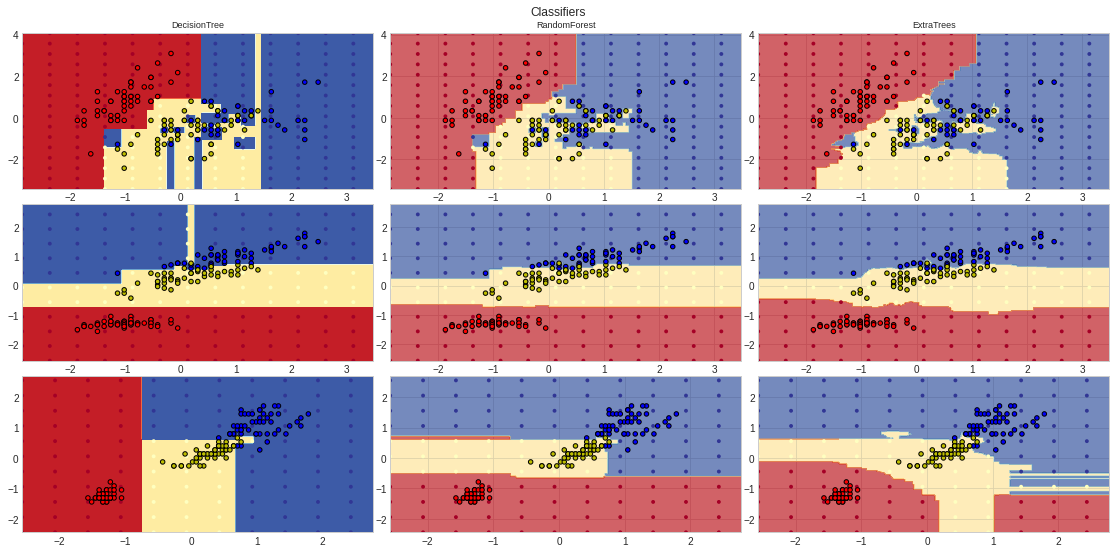

In [132]:
plt.figure(figsize = (16,8))

for pair in ([0,1],[0,2],[2,3]):

  for model in models:

    X = iris.data[:,pair]
    y = iris.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    mean = X.mean(axis = 0)
    std = X.std(axis = 0)
    X = (X-mean)/std

    model.fit(X,y)

    model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]
  
    plt.subplot(3, 3, plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize = 9)

    x_min, x_max = X[:,0].min()-1 , X[:,0].max() + 1
    y_min, y_max = X[:,1].min()-1 , X[:,1].max() + 1
    xx,yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    
    if isinstance(model, DecisionTreeClassifier):
      Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      cs = plt.contourf(xx,yy,Z,cmap = cmap) 

    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx,yy,Z,alpha = estimator_alpha, cmap = cmap)

    xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                         np.arange(y_min, y_max, plot_step_coarser))
    Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                           yy_coarser.ravel()]).reshape(xx_coarser.shape)
    cs_points = plt.scatter(xx_coarser,yy_coarser, s=15,
                            c = Z_points_coarser, cmap = cmap,
                            edgecolor = "none")
    
    plt.scatter(X[:,0],X[:,1],c=y,
                cmap = ListedColormap(['r','y','b']),
                edgecolor = 'k',s = 20)
    plot_idx +=1

plt.suptitle("Classifiers", fontsize = 12)
plt.axis('tight')
plt.tight_layout(h_pad = 0.2, w_pad = 0.2, pad = 2.5)
plt.show()

In [129]:
plot_idx = 1
models = [DecisionTreeRegressor(max_depth = None),
          RandomForestRegressor(n_estimators=n_estimators),
          ExtraTreesRegressor(n_estimators=n_estimators)]

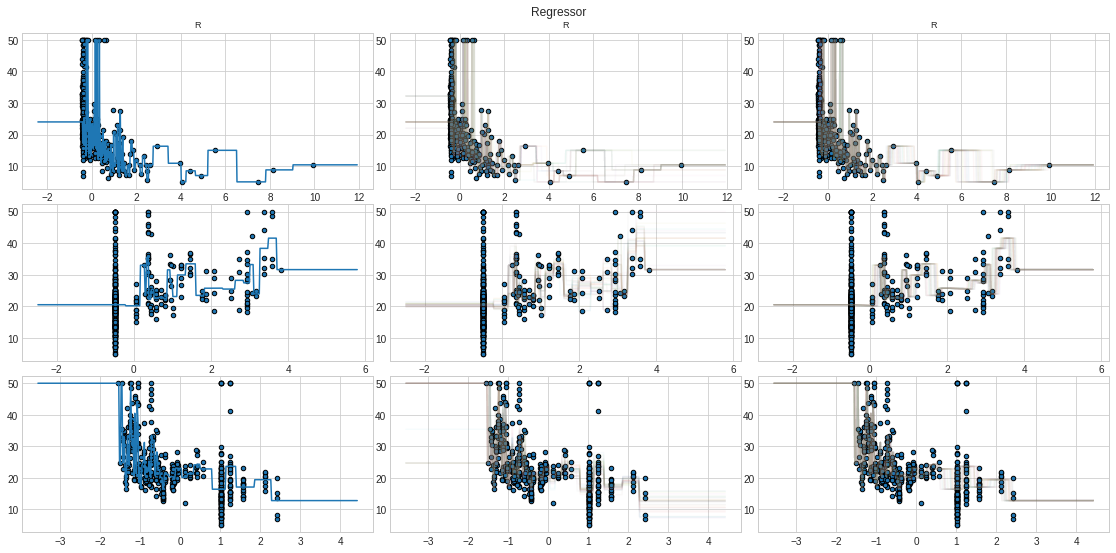

In [130]:
plt.figure(figsize = (16,8))

for pair in (0,1,2):

  for model in models:

    X = boston.data[:,pair]
    y = boston.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    mean = X.mean(axis = 0)
    std = X.std(axis = 0)
    X = (X-mean) / std

    model.fit(X.reshape(-1,1),y)

    model_title = str(type(model)).split(".")[-1][:-2][-len('Regressor')]
    
    plt.subplot(3,3,plot_idx)
    if plot_idx <=len(models):
      plt.title(model_title, fontsize = 9)
    
    x_min, x_max = X.min() - 1, X.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx,yy = np.arange(x_min-1, x_max+1, plot_step), np.arange(y_min-1, y_max+1, plot_step)

    if isinstance(model, DecisionTreeRegressor):
      Z = model.predict(xx.reshape(-1,1))
      cs = plt.plot(xx,Z)

    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = tree.predict(xx.reshape(-1,1))
        cs = plt.plot(xx,Z,alpha = estimator_alpha)

    plt.scatter(X,y,edgecolors = 'k', s=20)
    plot_idx +=1

plt.suptitle("Regressor", fontsize = 12)
plt.axis('tight')
plt.tight_layout(h_pad = 0.2, w_pad = 0.2, pad = 2.5)
plt.show()

## AdaBoost

* 대표적인 부스팅 알고리즘
* 일련의 약한 모델들을 학습
* 수정된 버전의 데이터를 반복 학습 (가중치가 적용된)
* 가중치 투표(또는 합)을 통해 각 모델의 예측 값을 결합
* 첫 단계에서는 원본 데이터를 학습하고 연속적인 반복마다 개별 샘플에 대한 가중치가 수정되고 다시 모델이 학습
  * 잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소
  * 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게 됨

![AdaBoost](https://scikit-learn.org/stable/_images/sphx_glr_plot_adaboost_hastie_10_2_0011.png)

In [133]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

### AdaBoost 분류

In [134]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier()
)

In [135]:
# iris data
cross_val = cross_validate(
    estimator = model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.1169370174407959 (+/- 0.019582012674989466)
avg score time : 0.015140628814697266 (+/- 0.0025857600865117963)
avg test time : 0.9466666666666667 (+/- 0.03399346342395189)


In [136]:
# wine data
cross_val = cross_validate(
    estimator = model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.12764883041381836 (+/- 0.011531609725515658)
avg score time : 0.013087177276611328 (+/- 0.0016214448414620818)
avg test time : 0.8085714285714285 (+/- 0.16822356718459935)


In [137]:
# cancer data
cross_val = cross_validate(
    estimator = model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.24376120567321777 (+/- 0.013351408104005919)
avg score time : 0.016124820709228514 (+/- 0.002947523118947043)
avg test time : 0.9718677224033534 (+/- 0.0195587047134823)


### AdaBoost 회귀

In [138]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostRegressor()
)

In [139]:
# boston data
cross_val = cross_validate(
    estimator = model,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.16123876571655274 (+/- 0.02100983542737041)
avg score time : 0.00709385871887207 (+/- 0.0005681557341018509)
avg test time : 0.5775416544032456 (+/- 0.22578251290485477)


In [140]:
# diabetes data
cross_val = cross_validate(
    estimator = model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.13836274147033692 (+/- 0.05349093538819517)
avg score time : 0.005913591384887696 (+/- 0.0012917903969734963)
avg test time : 0.4131663046666523 (+/- 0.04673044215720032)


## Gradient Tree Boosting

* 임의의 차별화 가능한 손실함수로 일반화한 부스팅 알고리즘
* 웹 검색, 분류 및 회귀 등 다양한 분야에서 모두 사용 가능

In [141]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

### Gradient Tree Boosting 분류

In [144]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier()
)

In [145]:
# iris data
cross_val = cross_validate(
    estimator = model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.413822603225708 (+/- 0.06491925129315676)
avg score time : 0.0016057968139648437 (+/- 0.00016014740475810087)
avg test time : 0.9666666666666668 (+/- 0.02108185106778919)


In [146]:
# wine data
cross_val = cross_validate(
    estimator = model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.5047019481658935 (+/- 0.03027863815211643)
avg score time : 0.0016697406768798827 (+/- 0.00011372047388489565)
avg test time : 0.9385714285714286 (+/- 0.032068206474093704)


In [147]:
# cancer data
cross_val = cross_validate(
    estimator = model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.6579936981201172 (+/- 0.013765244353983665)
avg score time : 0.0016829967498779297 (+/- 7.592050231976822e-05)
avg test time : 0.9596180717279925 (+/- 0.021164983541135364)


### Gradient Tree Boosting 회귀

In [148]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor()
)

In [149]:
# boston data
cross_val = cross_validate(
    estimator = model,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.18035168647766114 (+/- 0.009250012705062767)
avg score time : 0.001443767547607422 (+/- 0.00010906795040873453)
avg test time : 0.6776736303681203 (+/- 0.1567955660123328)


In [150]:
# diabetes data
cross_val = cross_validate(
    estimator = model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.12600102424621581 (+/- 0.01597842505637376)
avg score time : 0.0014836311340332032 (+/- 0.00020965502294954406)
avg test time : 0.40869238419512666 (+/- 0.07073786601789876)


## 투표 기반 분류 (Voting Classifier)

* 서로 다른 모델들의 결과를 투표를 통해 결합
* 두가지 방법으로 투표 가능
  * 가장 많이 예측된 클래스를 정답으로 채택 (hard voting)
  * 예측된 확률의 가중치 평균 (soft voting)

In [151]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [153]:
model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators = [('svc',model1),('naive',model2), ('forest', model3)],
    voting = 'hard'
)

In [163]:
# iris data hard
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, iris.data, iris.target, cv=5)
  print('Accuracy : %0.2f (+/-  %0.2f [%s]' % (scores.mean(), scores.std(), model_name))

Accuracy : 0.97 (+/-  0.02 [SVC]
Accuracy : 0.95 (+/-  0.03 [GaussianNB]
Accuracy : 0.97 (+/-  0.02 [RandomForestClassifier]
Accuracy : 0.95 (+/-  0.03 [VotingClassifier]


In [164]:
model1 = SVC(probability = True)
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators = [('svc',model1),('naive',model2), ('forest', model3)],
    voting = 'soft',
    weights = [2,1,2]
)

In [165]:
# iris data soft
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, iris.data, iris.target, cv=5)
  print('Accuracy : %0.2f (+/-  %0.2f [%s]' % (scores.mean(), scores.std(), model_name))

Accuracy : 0.97 (+/-  0.02 [SVC]
Accuracy : 0.95 (+/-  0.03 [GaussianNB]
Accuracy : 0.97 (+/-  0.02 [RandomForestClassifier]
Accuracy : 0.96 (+/-  0.02 [VotingClassifier]


### 결정 경계 시각화

In [167]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from itertools import product

In [168]:
X = iris.data[:,[0,2]]
y = iris.target

In [172]:
model1 = DecisionTreeClassifier(max_depth = 4)
model2 = KNeighborsClassifier(n_neighbors = 7)
model3 = SVC(gamma = .1, kernel = 'rbf', probability = True)
vote_model = VotingClassifier(estimators = [("dt", model1),('knn',model2), ('svc', model3)], 
                                            voting = 'soft', weights = [2,1,2])

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
vote_model = vote_model.fit(X,y)

In [175]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                    np.arange(y_min, y_max, 0.1))

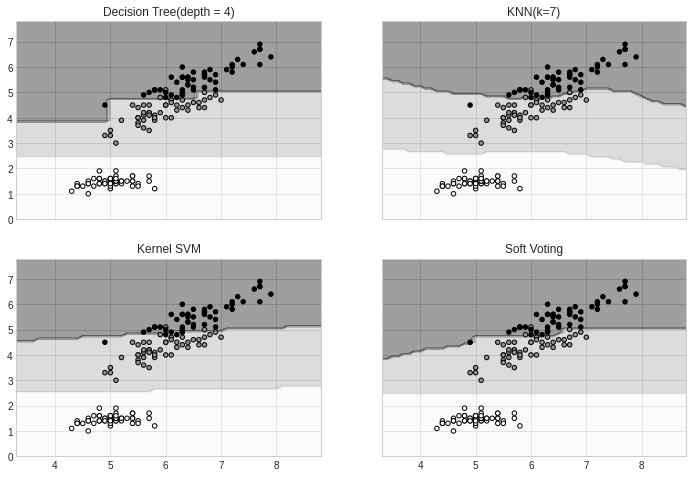

In [176]:
f, axarr = plt.subplots(2,2, sharex = 'col', sharey = 'row', figsize = (12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1, model2, model3, vote_model],
                          ["Decision Tree(depth = 4)", "KNN(k=7)",
                           "Kernel SVM", "Soft Voting"]):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx,yy,Z, alpha = 0.4)
  axarr[idx[0], idx[1]].scatter(X[:,0], X[:,1], c=y, s=20, edgecolor = 'k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 투표 기반 회귀 (Voting Regressor)

* 서로 다른 모델의 예측 값의 평균을 사용

In [177]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [178]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators = [('linear', model1), ('gbr', model2), ('rfr', model3)],
    weights = [1,1,1]
)

In [184]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, boston.data, boston.target, cv=5)
  print('R2: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

R2: 0.35 (+/- 0.38) [LinearRegression]
R2: 0.68 (+/- 0.15) [GradientBoostingRegressor]
R2: 0.62 (+/- 0.23) [RandomForestRegressor]
R2: 0.66 (+/- 0.20) [VotingRegressor]


### 회귀식 시각화

In [186]:
X = boston.data[:,0].reshape(-1,1)
y = boston.target

In [187]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators = [('linear', model1), ('gbr', model2), ('rfr', model3)],
    weights = [1,1,1]
)

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
vote_model = vote_model.fit(X,y)

In [188]:
x_min, x_max = X.min() - 1, X.max() + 1
xx = np.arange(x_min-1, x_max +1, 0.1)

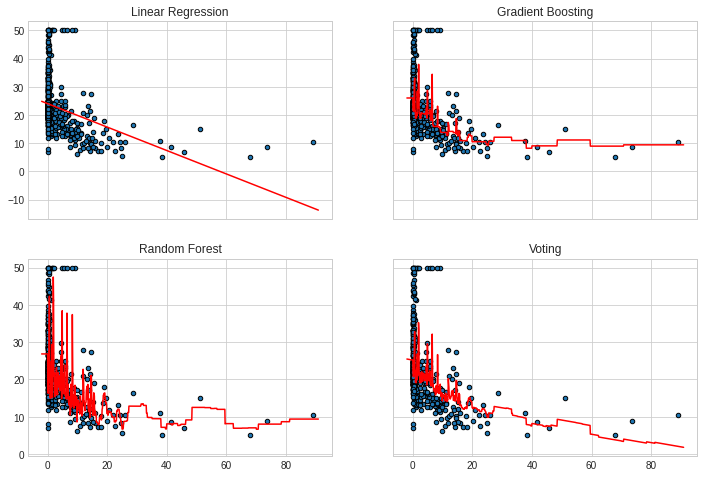

In [189]:
f, axarr = plt.subplots(2,2, sharex = 'col', sharey = 'row', figsize = (12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1, model2, model3, vote_model],
                          ["Linear Regression", "Gradient Boosting","Random Forest", "Voting"]):
  Z = model.predict(xx.reshape(-1,1))

  axarr[idx[0], idx[1]].plot(xx,Z,c='r')
  axarr[idx[0], idx[1]].scatter(X,y,s=20, edgecolor = 'k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 스택 일반화 (Stacked Generalization)

* 각 모델의 예측 값을 최종 모델의 입력으로 사용
* 모델의 편향을 줄이는데 효과적

### 스택 회귀

In [190]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [192]:
estimators = [('ridge',Ridge()),
              ('lasso',Lasso()),
              ('svr',SVR())]

In [193]:
reg = make_pipeline(
    StandardScaler(),
    StackingRegressor(
        estimators = estimators,
        final_estimator = GradientBoostingRegressor()
    )
)

In [194]:
# boston data
cross_val = cross_validate(
    estimator = reg,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.24985675811767577 (+/- 0.011847117325723171)
avg score time : 0.006852149963378906 (+/- 0.00011786822347363064)
avg test time : 0.32362304028464717 (+/- 0.3323344756241407)


#### 회귀식 시각화

In [ ]:
X = boston.data[:,0].reshape(-1,1)
y = boston.target

In [195]:
model1 = Ridge()
model2 = Lasso()
model3 = SVR()
reg = StackingRegressor(
        estimators = estimators,
        final_estimator = GradientBoostingRegressor()
    )

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
reg = reg.fit(X,y)

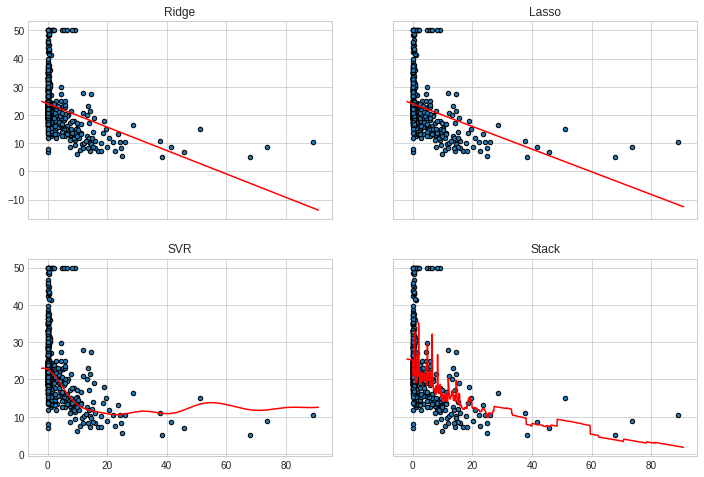

In [196]:
f, axarr = plt.subplots(2,2, sharex = 'col', sharey = 'row', figsize = (12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1, model2, model3, vote_model],
                          ["Ridge", "Lasso","SVR", "Stack"]):
  Z = model.predict(xx.reshape(-1,1))

  axarr[idx[0], idx[1]].plot(xx,Z,c='r')
  axarr[idx[0], idx[1]].scatter(X,y,s=20, edgecolor = 'k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

### 스택 분류

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [203]:
estimators = [('logistic',LogisticRegression(max_iter = 10000)),
              ('svc',SVC()),
              ('naive',GaussianNB())]

In [206]:
clf = StackingClassifier(
        estimators = estimators,
        final_estimator = RandomForestClassifier() # estimator에 있는 logistic, svc, naive 사용해 최종으로 randomforestclassifier 사용
    )

In [207]:
# iris data
cross_val = cross_validate(
    estimator = clf,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time : {} (+/- {})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time : 0.5367053508758545 (+/- 0.02745960403279339)
avg score time : 0.018660449981689455 (+/- 0.002650195990395291)
avg test time : 0.9733333333333334 (+/- 0.02494438257849294)


#### 결정 경계 시각화

In [211]:
X = iris.data[:,[0,2]]
y = iris.target

In [212]:
model1 = LogisticRegression(max_iter = 10000)
model2 = SVC()
model3 = GaussianNB()
stack = StackingClassifier(
    estimators = estimators, 
    final_estimator = RandomForestClassifier()
)

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
stack = stack.fit(X,y)

In [213]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                    np.arange(y_min, y_max, 0.1))

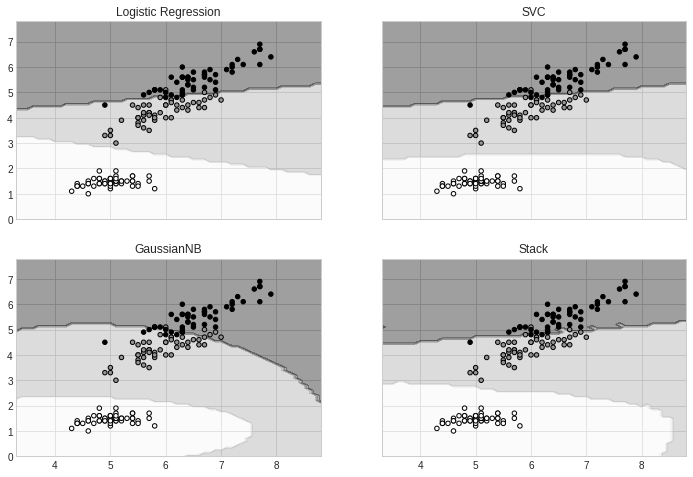

In [214]:
f, axarr = plt.subplots(2,2, sharex = 'col', sharey = 'row', figsize = (12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1, model2, model3, stack],
                          ["Logistic Regression", "SVC",
                           "GaussianNB", "Stack"]):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx,yy,Z, alpha = 0.4)
  axarr[idx[0], idx[1]].scatter(X[:,0], X[:,1], c=y, s=20, edgecolor = 'k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()